In [12]:
from pathlib import Path
from typing import List
import json
from captioned_image import CaptionedImage
import cv2 as cv
from matplotlib import pyplot as plt

cv2 = cv

BIRDS_PATH = Path("data/birds/birds.json")
FLOWERS_PATH = Path("data/flowers/flowers.json")


with open(FLOWERS_PATH) as f:
    flowers = [CaptionedImage.parse_obj(v) for v in json.load(f)]


with open(BIRDS_PATH) as f:
    birds = [CaptionedImage.parse_obj(v) for v in json.load(f)]


def show(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

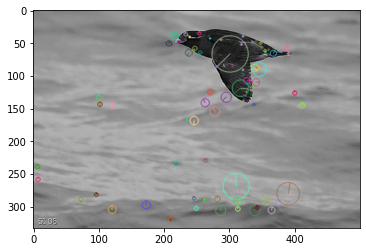

array([[ 22.5       ,   8.5       ,  13.        ,  34.5       ,
         34.75      ,   2.        ,   0.        ,   1.25      ,
         30.25      ,  11.75      ,  10.5       ,  41.75      ,
         46.25      ,   3.        ,   0.        ,  17.5       ,
         65.5       ,  15.25      ,   3.        ,  13.25      ,
         12.        ,   1.5       ,   2.25      ,  33.5       ,
         23.25      ,   1.        ,   0.        ,   6.        ,
         12.75      ,   1.75      ,   2.        ,  20.75      ,
         35.5       ,  19.25      ,   3.75      ,  32.25      ,
         51.        ,   4.25      ,   0.        ,   0.75      ,
         58.75      ,  16.        ,   3.25      ,  39.25      ,
         80.        ,   5.5       ,   0.25      ,  12.75      ,
        128.75      ,  18.75      ,   2.25      ,  17.        ,
         27.25      ,   1.5       ,   0.75      ,  19.        ,
         42.25      ,   1.75      ,   1.25      ,  11.25      ,
         18.25      ,   3.        ,   0.

In [21]:
img = cv.imread(birds[0].image_path)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(img, None)
img = cv.drawKeypoints(
    gray, keypoints, img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)
show(img)
# cv.imshow(img)

dictionary_size = 5

BOW = cv.BOWKMeansTrainer(dictionary_size)
BOW.add(descriptors)
# for p in training_paths:
#     image = cv2.imread(p)
#     gray = cv2.cvtColor(image, cv2.CV_LOAD_IMAGE_GRAYSCALE)
#     kp, dsc= sift.detectAndCompute(gray, None)
#

# #dictionary created
dictionary = BOW.cluster()
dictionary